Netflix is one of the most popular media and video streaming platforms. They have over 10000 movies or # tv shows available on their platform, as of mid-2021, they have over 222M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

Importing all the important libraris

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Reading the Netflix CSV File**

In [ ]:
df = pd.read_csv("/content/sample_data/Netflix_case_study.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## **Finding all important information abou the Dataframe like shape, columns etc.**

In [ ]:
df.shape

(8807, 12)

In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
df.loc[df['type']=='Movie'].shape

(6031, 17)

In [ ]:
df.loc[df['type']=='TV Show'].shape

(2581, 17)

# ** Column listed_in is renamed to genre**

In [ ]:
df.rename(columns={'listed_in':'genre'},inplace=True)
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'genre', 'description'],
      dtype='object')

# **Checking for duplicate and Nan values in various columns within the Dataframe**

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.nunique().sort_values(ascending=False)

show_id         8807
title           8807
description     8775
cast            7692
director        4528
date_added      1767
country          748
genre            514
duration         220
release_year      74
rating            17
type               2
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  genre         8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
null = df.isna().sum().sort_values(ascending=False)
percent = round(df.isna().mean()*100,2).sort_values(ascending = False)

missing_data = pd.concat([null,percent],axis=1,keys=['Missing Value Count','Percentage'])

print('Total Records Present: ',df.shape[0])
print(missing_data[missing_data['Missing Value Count']!=0])
print('Total','                    ',missing_data['Missing Value Count'].sum(),'      ',round(100*(missing_data['Missing Value Count'].sum()/df.shape[0]),2))

Total Records Present:  8807
            Missing Value Count  Percentage
director                   2634       29.91
country                     831        9.44
cast                        825        9.37
date_added                   10        0.11
rating                        4        0.05
duration                      3        0.03
Total                      4307        48.9


# **Checking for missing values an d it's percentage**

In [ ]:
df.isna().mean() * 100

show_id          0.000000
type             0.000000
title            0.000000
director        29.273107
cast             8.267534
country          8.511379
date_added       0.000000
release_year     0.000000
rating           0.000000
duration         0.000000
genre            0.000000
description      0.000000
day              0.000000
month            0.000000
year             0.000000
month_name       0.000000
weekday          0.000000
dtype: float64

# **Converting date_added column from object to datetime**

In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  genre         8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


# **Dropping Nan values for date_added, rating,duration since the Nan values are less than 1 %**

In [ ]:
df.dropna(subset = ['date_added'],inplace=True)
df['date_added'].isna().sum()

0

In [ ]:
df.dropna(subset = ['rating'],inplace=True)
df['rating'].isna().sum()

0

In [ ]:
df.dropna(subset = ['duration'],inplace=True)
df['rating'].isna().sum()

0

In [ ]:
null = df.isna().sum().sort_values(ascending=False)
percent = round(df.isna().mean()*100,2).sort_values(ascending = False)

missing_data = pd.concat([null,percent],axis=1,keys=['Missing Value Count','Percentage'])

print('Total Records Present: ',df.shape[0])
print(missing_data[missing_data['Missing Value Count']!=0])
print('Total','                  ',missing_data['Missing Value Count'].sum(),'     ',round(100*(missing_data['Missing Value Count'].sum()/df.shape[0]),2))

Total Records Present:  8790
          Missing Value Count  Percentage
director                 2621       29.82
country                   829        9.43
cast                      825        9.39
Total                    4275       48.63


# **Adding the Day, Month, Year, Month Name, Day Name for further Analysis**

In [ ]:
df['day'] = df['date_added'].dt.day
df['month'] = df['date_added'].dt.month
df['year'] = df['date_added'].dt.year
df['month_name'] = df['date_added'].dt.month_name()
df['weekday'] = df['date_added'].dt.day_name()
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description,day,month,year,month_name,weekday
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",25,9,2021,September,Saturday
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24,9,2021,September,Friday
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",24,9,2021,September,Friday
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,24,9,2021,September,Friday


In [ ]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

# **Generalising rating into 3 main categories of Kids, Teens and Adults as per Netflix official site

['TV-Y','TV-Y7','G','TV-G','PG','TV-PG','TV-Y7-FV']- 'Kids'

['PG-13','TV-14'] - 'Teens'

['R','TV-MA','NC-17'] - 'Adults'

In [ ]:
df['rating'] = df['rating'].replace(['TV-Y','TV-Y7','G','TV-G','PG','TV-PG','TV-Y7-FV'],'Kids')
df['rating'] = df['rating'].replace(['PG-13','TV-14'],'Teens')
df['rating'] = df['rating'].replace(['R','TV-MA','NC-17'],'Adults')
df['rating'] = df['rating'].replace(['NR','UR'],np.NaN)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description,day,month,year,month_name,weekday
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,Teens,90 min,Documentaries,"As her father nears the end of his life, filmm...",25,9,2021,September,Saturday
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,Adults,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24,9,2021,September,Friday
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,Adults,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",24,9,2021,September,Friday
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,24,9,2021,September,Friday


In [ ]:
df['rating'].unique()

array(['Teens', 'Adults', 'Kids', nan], dtype=object)

# **Checking and dropping Nan values for rating column**

In [ ]:
df['rating'].isna().sum()

82

In [ ]:
df.dropna(subset = ['rating'],inplace=True)
df['rating'].isna().sum()

0

Checking for percentage of Nan values

In [ ]:
null = df.isna().sum().sort_values(ascending=False)
percent = round(df.isna().mean()*100,2).sort_values(ascending = False)

missing_data = pd.concat([null,percent],axis=1,keys=['Missing Value Count','Percentage'])

print('Total Records Present: ',df.shape[0])
print(missing_data[missing_data['Missing Value Count']!=0])
print('Total','                  ',missing_data['Missing Value Count'].sum(),'     ',round(100*(missing_data['Missing Value Count'].sum()/df.shape[0]),2))

Total Records Present:  8708
          Missing Value Count  Percentage
director                 2617       30.05
country                   829        9.52
cast                      808        9.28
Total                    4254       48.85


# Checking for nan values in director, country and cast column together

In [ ]:
df[(df['director'].isna()) & (df['country'].isna()) & (df['cast'].isna())].shape

(96, 17)

In [ ]:
df.shape

(8708, 17)

Since the no of nan values for all 3 columns (96) is too low than the total no of rown in the dataframe (8708). Hence, dropping the rows for nan values for 'director','country','cast'

In [ ]:
df.dropna(subset = ['director','country','cast'], how = 'all',inplace=True)
df.shape

(8612, 17)

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description,day,month,year,month_name,weekday
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,Teens,90 min,Documentaries,"As her father nears the end of his life, filmm...",25,9,2021,September,Saturday
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,Adults,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24,9,2021,September,Friday
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,24,9,2021,September,Friday
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,2021-09-24,2021,Adults,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,24,9,2021,September,Friday


Since there are multiple values in cast column separated by comma. Different rows must be created for the same for each cast member in order to analyse the data.

In [ ]:
df_cast = pd.DataFrame(df['cast'].apply(lambda x: str(x).split(', ')).tolist(),index=df['title'])
df_cast = df_cast.stack()
df_cast = pd.DataFrame(df_cast)
df_cast.reset_index(inplace=True)
df_cast = df_cast[['title',0]]
df_cast.columns =['title','cast']
df_cast.replace('nan',np.NaN,inplace=True)
df_cast.isna().sum()

title      0
cast     712
dtype: int64

Since there are multiple values in Genre column separated by comma. Different rows must be created for the same for each Genre in order to analyse the data in a better manner.

In [ ]:
df_genre = pd.DataFrame(df['genre'].apply(lambda x: str(x).split(', ')).tolist(),index=df['title'])
df_genre = df_genre.stack()
df_genre = pd.DataFrame(df_genre)
df_genre.reset_index(inplace=True)
df_genre = df_genre[['title',0]]
df_genre.columns =['title','genre']
df_genre

,title,genre
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows
...,...,...
18932,Zoom,Children & Family Movies
18933,Zoom,Comedies
18934,Zubaan,Dramas
18935,Zubaan,International Movies


In [ ]:
df_director = pd.DataFrame(df['director'].apply(lambda x: str(x).split(', ')).tolist(),index=df['title'])
df_director = df_director.stack()
df_director = pd.DataFrame(df_director)
df_director.reset_index(inplace=True)
df_director = df_director[['title',0]]
df_director.columns =['title','director']
df_director.replace('nan',np.NaN,inplace=True)
df_director.isna().sum()

title          0
director    2521
dtype: int64

Since there are multiple values in Country column separated by comma. Different rows must be created for the same for each Country in order to analyse the data in a better manner.

In [ ]:
df_country = pd.DataFrame(df['country'].apply(lambda x: str(x).split(', ')).tolist(),index=df['title'])
df_country = df_country.stack()
df_country = pd.DataFrame(df_country)
df_country.reset_index(inplace=True)
df_country = df_country[['title',0]]
df_country.columns =['title','country']
df_country.replace('nan',np.NaN,inplace=True)
df_country.isna().sum()

title        0
country    733
dtype: int64

Merging the cast dataframe with genre dataframe to create final dataframe

In [ ]:
df12 = df_cast.merge(df_genre, on = 'title')
df12

,title,cast,genre
0,Dick Johnson Is Dead,NaN,Documentaries
1,Blood & Water,Ama Qamata,International TV Shows
2,Blood & Water,Ama Qamata,TV Dramas
3,Blood & Water,Ama Qamata,TV Mysteries
4,Blood & Water,Khosi Ngema,International TV Shows
...,...,...,...
147927,Zubaan,Anita Shabdish,International Movies
147928,Zubaan,Anita Shabdish,Music & Musicals
147929,Zubaan,Chittaranjan Tripathy,Dramas
147930,Zubaan,Chittaranjan Tripathy,International Movies


Merging the title dataframe with cast,title, genre dataframe (i.e. resultant dataframe from previous rows) to create final dataframe

In [ ]:
df123 = df_director.merge(df12, on = 'title')
df123

,title,director,cast,genre
0,Dick Johnson Is Dead,Kirsten Johnson,NaN,Documentaries
1,Blood & Water,NaN,Ama Qamata,International TV Shows
2,Blood & Water,NaN,Ama Qamata,TV Dramas
3,Blood & Water,NaN,Ama Qamata,TV Mysteries
4,Blood & Water,NaN,Khosi Ngema,International TV Shows
...,...,...,...,...
159583,Zubaan,Mozez Singh,Anita Shabdish,International Movies
159584,Zubaan,Mozez Singh,Anita Shabdish,Music & Musicals
159585,Zubaan,Mozez Singh,Chittaranjan Tripathy,Dramas
159586,Zubaan,Mozez Singh,Chittaranjan Tripathy,International Movies


Merging the country dataframe with cast,title, genre, director dataframe (i.e. resultant dataframe from previous rows) to create final dataframe

In [ ]:
df1234 = df_country.merge(df123, on = 'title')
df1234

,title,country,director,cast,genre
0,Dick Johnson Is Dead,United States,Kirsten Johnson,NaN,Documentaries
1,Blood & Water,South Africa,NaN,Ama Qamata,International TV Shows
2,Blood & Water,South Africa,NaN,Ama Qamata,TV Dramas
3,Blood & Water,South Africa,NaN,Ama Qamata,TV Mysteries
4,Blood & Water,South Africa,NaN,Khosi Ngema,International TV Shows
...,...,...,...,...,...
199945,Zubaan,India,Mozez Singh,Anita Shabdish,International Movies
199946,Zubaan,India,Mozez Singh,Anita Shabdish,Music & Musicals
199947,Zubaan,India,Mozez Singh,Chittaranjan Tripathy,Dramas
199948,Zubaan,India,Mozez Singh,Chittaranjan Tripathy,International Movies


Merging the cast,title, genre, director, country datafram to the original dataframe. Hence, creating the final dataframe

In [ ]:
df_new = df.merge(df1234, on = 'title')
df_new

,show_id,type,title,director_x,cast_x,country_x,date_added,release_year,rating,duration,...,description,day,month,year,month_name,weekday,country_y,director_y,cast_y,genre_y
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,Teens,90 min,...,"As her father nears the end of his life, filmm...",25,9,2021,September,Saturday,United States,Kirsten Johnson,NaN,Documentaries
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,Adults,2 Seasons,...,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,NaN,Ama Qamata,International TV Shows
2,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,Adults,2 Seasons,...,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,NaN,Ama Qamata,TV Dramas
3,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,Adults,2 Seasons,...,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,NaN,Ama Qamata,TV Mysteries
4,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,Adults,2 Seasons,...,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,NaN,Khosi Ngema,International TV Shows
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199945,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,Teens,111 min,...,A scrappy but poor boy worms his way into a ty...,2,3,2019,March,Saturday,India,Mozez Singh,Anita Shabdish,International Movies
199946,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,Teens,111 min,...,A scrappy but poor boy worms his way into a ty...,2,3,2019,March,Saturday,India,Mozez Singh,Anita Shabdish,Music & Musicals
199947,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,Teens,111 min,...,A scrappy but poor boy worms his way into a ty...,2,3,2019,March,Saturday,India,Mozez Singh,Chittaranjan Tripathy,Dramas
199948,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,Teens,111 min,...,A scrappy but poor boy worms his way into a ty...,2,3,2019,March,Saturday,India,Mozez Singh,Chittaranjan Tripathy,International Movies


Dropping the columns for 'cast_x','country_x','director_x','genre_x' from the final dataframe since they are duplicate and have old values.

Also, renaming the new merged columns country, cast, director and genre, so as to amke thme the original column.

In [ ]:
df_new.drop(columns = ['cast_x','country_x','director_x','genre_x'],inplace=True)
df_new.rename(columns={'country_y':'country','director_y':'director','cast_y':'cast','genre_y':'genre'},inplace=True)
df_new.head()

,show_id,type,title,date_added,release_year,rating,duration,description,day,month,year,month_name,weekday,country,director,cast,genre
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,Teens,90 min,"As her father nears the end of his life, filmm...",25,9,2021,September,Saturday,United States,Kirsten Johnson,NaN,Documentaries
1,s2,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,NaN,Ama Qamata,International TV Shows
2,s2,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,NaN,Ama Qamata,TV Dramas
3,s2,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,NaN,Ama Qamata,TV Mysteries
4,s2,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,NaN,Khosi Ngema,International TV Shows


Final now of Rows and column for the dataframe

In [ ]:
df_new.shape

(199950, 17)

Finding the percentage of Nana values in all the columns

In [ ]:
df_new.isna().mean() * 100

show_id         0.0
type            0.0
title           0.0
date_added      0.0
release_year    0.0
rating          0.0
duration        0.0
description     0.0
day             0.0
month           0.0
year            0.0
month_name      0.0
weekday         0.0
country         0.0
director        0.0
cast            0.0
genre           0.0
dtype: float64

In [ ]:
null = df_new.isna().sum().sort_values(ascending=False)
percent = round(df_new.isna().mean()*100,2).sort_values(ascending = False)

missing_data = pd.concat([null,percent],axis=1,keys=['Missing Value Count','Percentage'])

print('Total Records Present: ',df_new.shape[0])
print(missing_data[missing_data['Missing Value Count']!=0])
print('Total','                 ',missing_data['Missing Value Count'].sum(),'     ',round(100*(missing_data['Missing Value Count'].sum()/df_new.shape[0]),2))

Total Records Present:  199950
          Missing Value Count  Percentage
director                50116       25.06
country                 11710        5.86
cast                     1894        0.95
Total                   63720       31.87


Since the percentage of Nan values in Director, Cast and Country column is 25% ,1%, 5% respectively, which high in terms of the total rows. Hence, we are not deleting these rows and replacing them with gloabal value 'Unknown'

In [ ]:
df_new['cast'] = df_new['cast'].replace(np.NaN,'Unknown')
df_new['country'] = df_new['country'].replace(np.NaN,'Unknown')
df_new['director'] = df_new['director'].replace(np.NaN,'Unknown')

In [ ]:
df_new.head()

,show_id,type,title,date_added,release_year,rating,duration,description,day,month,year,month_name,weekday,country,director,cast,genre
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,Teens,90 min,"As her father nears the end of his life, filmm...",25,9,2021,September,Saturday,United States,Kirsten Johnson,Unknown,Documentaries
1,s2,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,Unknown,Ama Qamata,International TV Shows
2,s2,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,Unknown,Ama Qamata,TV Dramas
3,s2,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,Unknown,Ama Qamata,TV Mysteries
4,s2,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,Unknown,Khosi Ngema,International TV Shows


In [ ]:
null = df_new.isna().sum().sort_values(ascending=False)
percent = round(df_new.isna().mean()*100,2).sort_values(ascending = False)

missing_data = pd.concat([null,percent],axis=1,keys=['Missing Value Count','Percentage'])

print('Total Records Present: ',df_new.shape[0])
print(missing_data[missing_data['Missing Value Count']!=0])
print('Total','                 ',missing_data['Missing Value Count'].sum(),'     ',round(100*(missing_data['Missing Value Count'].sum()/df_new.shape[0]),2))

Total Records Present:  199950
Empty DataFrame
Columns: [Missing Value Count, Percentage]
Index: []
Total                   0       0.0


Checking info for the final dataframe.

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199950 entries, 0 to 199949
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       199950 non-null  object        
 1   type          199950 non-null  object        
 2   title         199950 non-null  object        
 3   date_added    199950 non-null  datetime64[ns]
 4   release_year  199950 non-null  int64         
 5   rating        199950 non-null  object        
 6   duration      199950 non-null  object        
 7   description   199950 non-null  object        
 8   day           199950 non-null  int64         
 9   month         199950 non-null  int64         
 10  year          199950 non-null  int64         
 11  month_name    199950 non-null  object        
 12  weekday       199950 non-null  object        
 13  country       199950 non-null  object        
 14  director      199950 non-null  object        
 15  cast          199

Finding the count of duplicate values in the final dataframe

In [ ]:
df_new.duplicated().sum()

55

Dropping the duplicate values

In [ ]:
df_new.drop_duplicates(keep='first',inplace=True)

In [ ]:
df_new.shape

(199895, 17)

We are the diving the final dataframe in two diffferent dataframes of Movies and TV Shows in order to analyse them separately

In [ ]:
df_movies = df_new.loc[df_new['type']=='Movie']
df_tvs = df_new.loc[df_new['type']=='TV Show']

In [ ]:
df_movies.shape

(144240, 17)

In [ ]:
df_tvs.shape

(55655, 17)

Replacing min to blank value in duration for better analysis

In [ ]:
df_movies['duration'] = df_movies['duration'].str.replace('min',"")
df_movies.head()

<ipython-input-48-f651817e6474>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies['duration'] = df_movies['duration'].str.replace('min',"")


,show_id,type,title,date_added,release_year,rating,duration,description,day,month,year,month_name,weekday,country,director,cast,genre
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,Teens,90,"As her father nears the end of his life, filmm...",25,9,2021,September,Saturday,United States,Kirsten Johnson,Unknown,Documentaries
157,s7,Movie,My Little Pony: A New Generation,2021-09-24,2021,Kids,91,Equestria's divided. But a bright-eyed hero be...,24,9,2021,September,Friday,Unknown,Robert Cullen,Vanessa Hudgens,Children & Family Movies
158,s7,Movie,My Little Pony: A New Generation,2021-09-24,2021,Kids,91,Equestria's divided. But a bright-eyed hero be...,24,9,2021,September,Friday,Unknown,Robert Cullen,Kimiko Glenn,Children & Family Movies
159,s7,Movie,My Little Pony: A New Generation,2021-09-24,2021,Kids,91,Equestria's divided. But a bright-eyed hero be...,24,9,2021,September,Friday,Unknown,Robert Cullen,James Marsden,Children & Family Movies
160,s7,Movie,My Little Pony: A New Generation,2021-09-24,2021,Kids,91,Equestria's divided. But a bright-eyed hero be...,24,9,2021,September,Friday,Unknown,Robert Cullen,Sofia Carson,Children & Family Movies


Replacing Season to blank value in duration for better analysis

In [ ]:
df_tvs['duration'] = df_tvs['duration'].str.replace('Seasons',"")
df_tvs['duration'] = df_tvs['duration'].str.replace('Season',"")
df_tvs.head()

<ipython-input-49-6a916ef228db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tvs['duration'] = df_tvs['duration'].str.replace('Seasons',"")
<ipython-input-49-6a916ef228db>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tvs['duration'] = df_tvs['duration'].str.replace('Season',"")


,show_id,type,title,date_added,release_year,rating,duration,description,day,month,year,month_name,weekday,country,director,cast,genre
1,s2,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,Unknown,Ama Qamata,International TV Shows
2,s2,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,Unknown,Ama Qamata,TV Dramas
3,s2,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,Unknown,Ama Qamata,TV Mysteries
4,s2,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,Unknown,Khosi Ngema,International TV Shows
5,s2,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,Unknown,Khosi Ngema,TV Dramas


Renaming duration column to seasons for TV series data

In [ ]:
df_tvs.rename(columns={'duration':'Seasons'},inplace=True)

<ipython-input-50-01aed987f93d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tvs.rename(columns={'duration':'Seasons'},inplace=True)


In [ ]:
df_tvs.head()

,show_id,type,title,date_added,release_year,rating,Seasons,description,day,month,year,month_name,weekday,country,director,cast,genre
1,s2,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,Unknown,Ama Qamata,International TV Shows
2,s2,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,Unknown,Ama Qamata,TV Dramas
3,s2,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,Unknown,Ama Qamata,TV Mysteries
4,s2,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,Unknown,Khosi Ngema,International TV Shows
5,s2,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,Unknown,Khosi Ngema,TV Dramas


# **Starting Exploratory Data Analysis**

In [ ]:
df_new['year'].min()

2008

In [ ]:
df_new['year'].max()

2021

The Netflix Data belongs from the year 2008 to 2021

**Summarizing the observations for the Netflix Case study:**

Total Content : 8612
Total Movies: 6031
Total TV SHows: 2581
Total No of Directors: 4926
Total No of Actors: 36149
Totla No of Countries: 128

In [ ]:
df.loc[df['type']=='Movie'].shape[0]

6031

In [ ]:
df.loc[df['type']=='TV Show'].shape[0]

2581

In [ ]:
df_new['country'].nunique()

128

In [ ]:
df_new['director'].nunique()

4926

In [ ]:
df_new['cast'].nunique()

36149

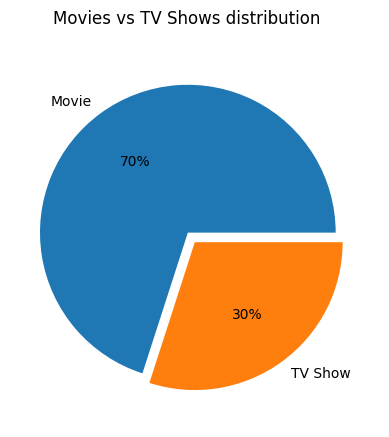

In [ ]:
labels = ['Movie', 'TV Show']
plt.pie(df.groupby('type')['type'].count(), labels = labels, explode = (0.08,0), autopct = '%0.0f%%')
plt.suptitle('Movies vs TV Shows distribution')
plt.show()

Inference

Netflix has 70% of its content as movies.

TV Shows are clearly less popular than Movies.


Recomendation: More TV Shows should be added as they create more suspense and have more story than a 100 minute movie. Users like to binge watch a particular story for a longer time.

We are dropping duplicates in order to plot the graph, since we need the un-nested data for each country and title. Hence, we will get only a single row for each country and title separately and this will allow us to get an accurate count of data

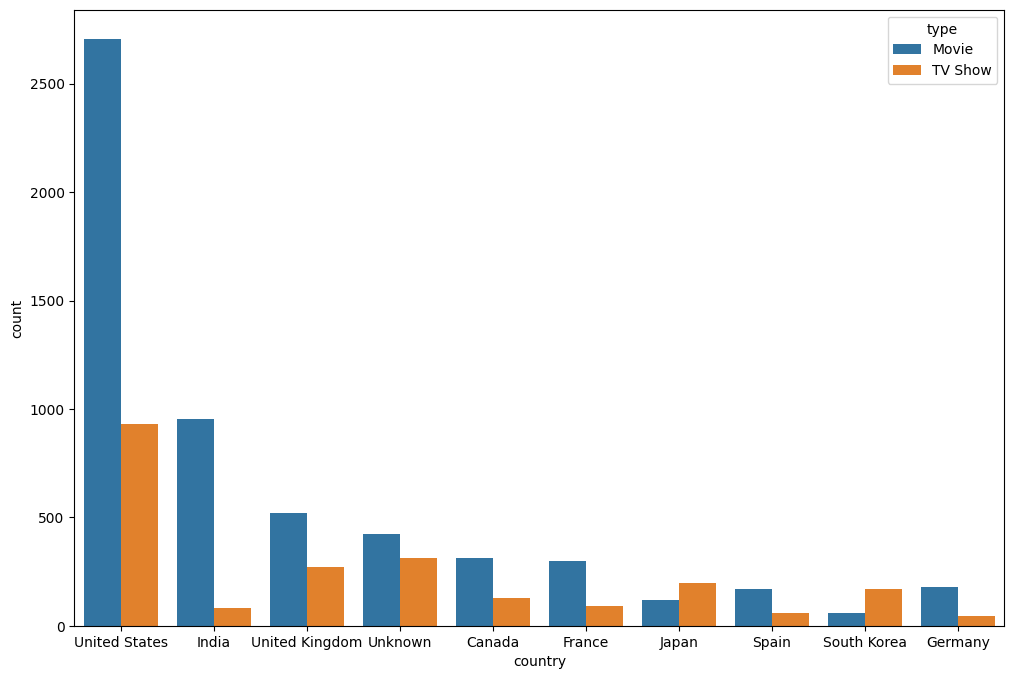

In [ ]:
df_temp = df_new.drop_duplicates(subset = ['country', 'title'])
x = df_temp['country'].value_counts().head(10)

plt.figure(figsize = (12,8))
plt.suptitle('Top 10 Directors')
sns.countplot(data = df_temp, x = 'country', hue = 'type', order=x.index)
plt.show()

**Inference:** It can be infered that most content is created in United states followed by India and UK.

However, most of the couteries have more Movies than TV shows but Japan and South Korea have more TV shows than movies.

**Recommendation:** We can observe that that the % of TV shows compared to Movies in other counteries is around 40-50%. But in India it si around 10-20%, hence no of TV shows can be increased can be in India.

TV shows have been recently quite popular hence they can be increased. Moreover popular, TV shows from the past can also be brought on the Netflix to increase viewship of the TV audience on the OTT platform.

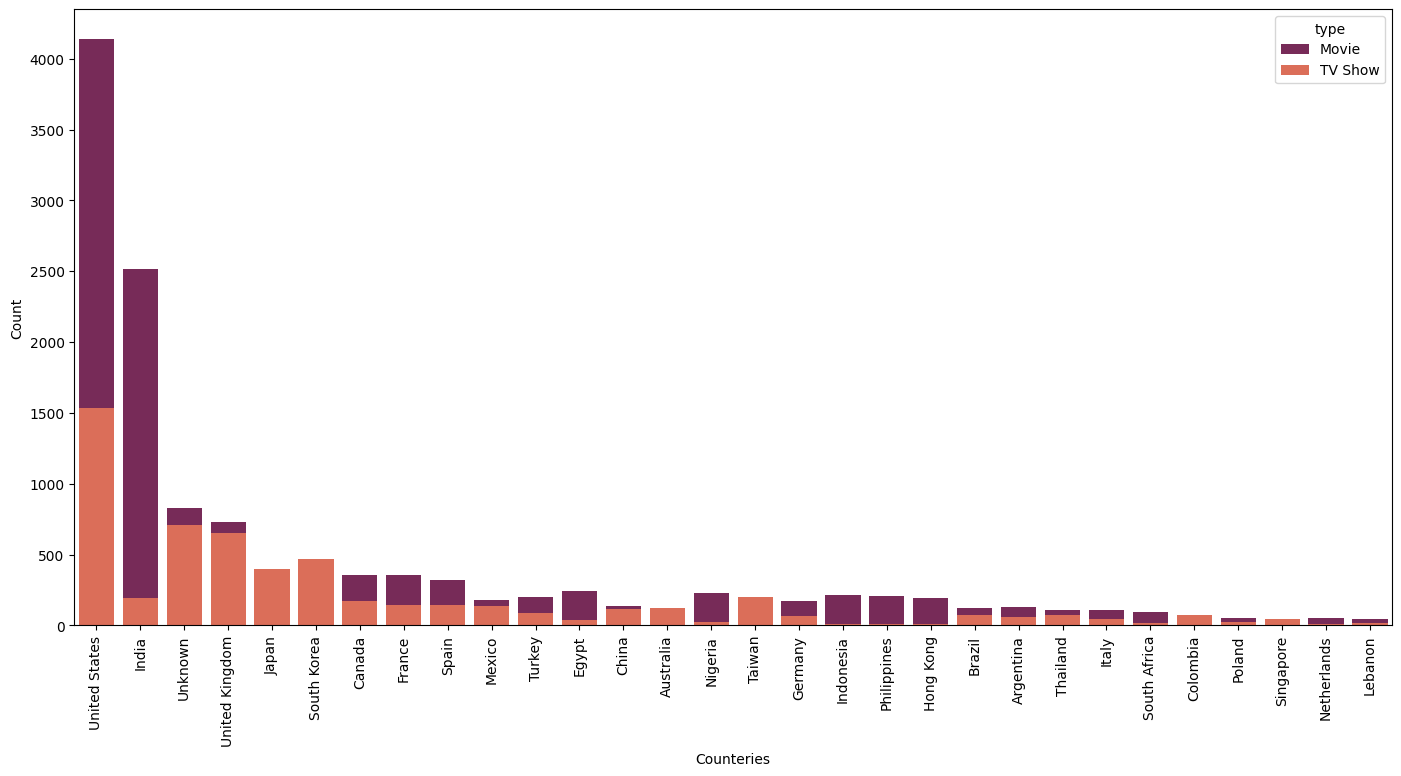

In [ ]:
plt.figure(figsize=(17,8))

df_temp = df_new.drop_duplicates(subset = ['genre','title'])
df_temp['genre'].value_counts()

sns.countplot(data = df_temp, x='country', hue = 'type', order = df_temp['country'].value_counts().head(30).index, dodge = False, palette='rocket')
plt.xticks(rotation=90)
plt.xlabel('Counteries')
plt.ylabel('Count')
plt.show()

**Note:** We are dropping duplicates for plotting this graph, since we need the un-nested data for each director and title. Hence, we will get only a single row for each director and title separately and this will allow us to get an accurate count of data

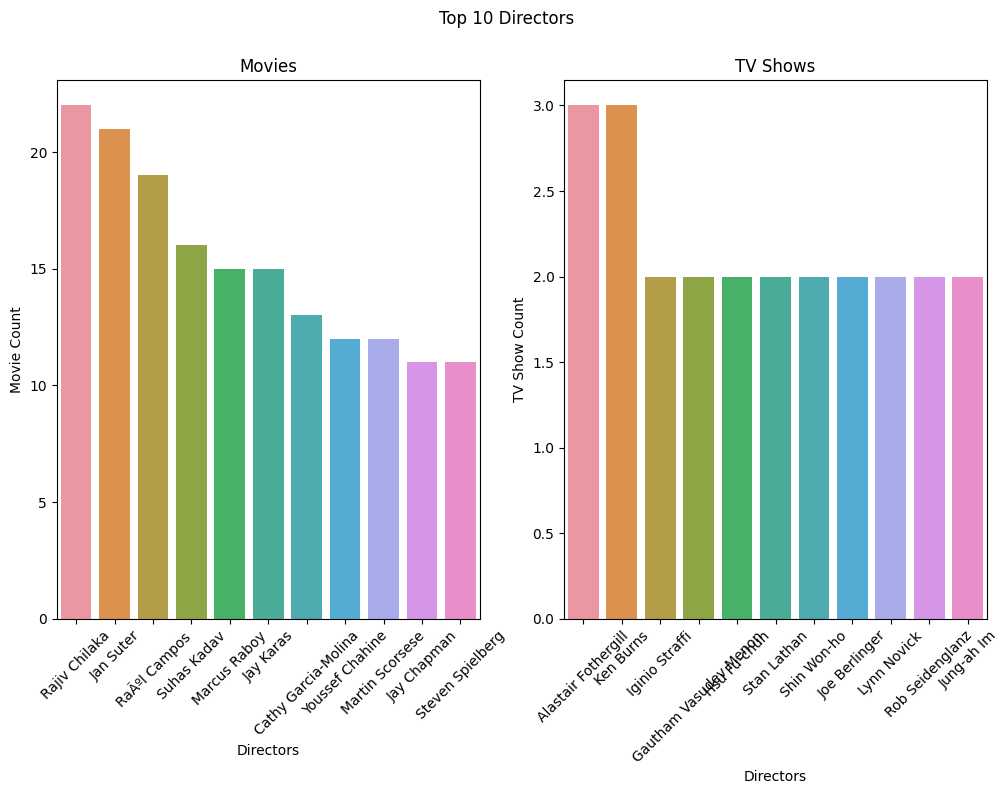

In [ ]:
df_movies_temp = df_movies.drop_duplicates(subset = ['director','title'])
df_tvs_temp = df_tvs.drop_duplicates(subset = ['director','title'])

plt.figure(figsize = (12,7))
plt.suptitle('Top 10 Directors')

plt.subplot(1,2,1)
sns.countplot(data=df_movies_temp, x='director', order = df_movies_temp['director'].value_counts()[1:12].index)
plt.title("Movies")
plt.xticks(rotation=45)
plt.xlabel('Directors')
plt.ylabel('Movie Count')

plt.subplot(1,2,2)
sns.countplot(data=df_tvs_temp, x='director', order = df_tvs_temp['director'].value_counts()[1:12].index)
plt.title("TV Shows")
plt.xticks(rotation=45)
plt.xlabel('Directors')
plt.ylabel('TV Show Count')

plt.show()

**Inference**: Most of the movies on Netflixs are directed by Rajiv Chilaka and Jan Suter.

**For TV shows:** Alastair Fothergill and Ken Burns have created the most TV shows. And it can also be observed that most of the TV series are created for 2-3 seasons.

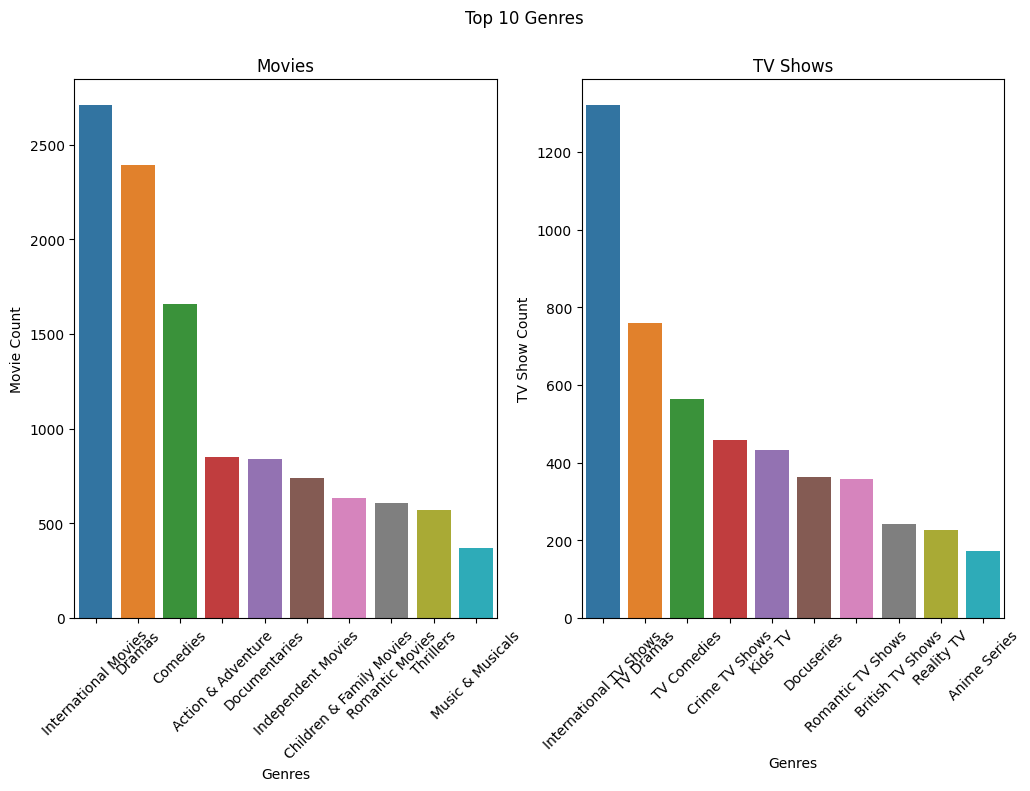

In [ ]:
df_movies_temp = df_movies.drop_duplicates(subset = ['genre','title'])
df_tvs_temp = df_tvs.drop_duplicates(subset = ['genre','title'])

plt.figure(figsize = (12,7))
plt.suptitle('Top 10 Genres')

plt.subplot(1,2,1)
sns.countplot(data= df_movies_temp, x='genre', order = df_movies_temp['genre'].value_counts().head(10).index)
plt.title("Movies")
plt.xticks(rotation=45)
plt.xlabel('Genres')
plt.ylabel('Movie Count')

plt.subplot(1,2,2)
sns.countplot(data=df_tvs_temp, x='genre', order = df_tvs_temp['genre'].value_counts().head(10).index)
plt.title("TV Shows")
plt.xticks(rotation=45)
plt.xlabel('Genres')
plt.ylabel('TV Show Count')

plt.show()

**Note:** We are dropping duplicates for plotting this graph, since we need the un-nested data for each genre and title. Hence, we will get only a single row for each genre and title separately and this will allow us to get an accurate count of data

**Inference**: From the above graph it can be inferred that most of the movies are International Movies and Dramas.

Similarly, most of the TV shows are International TV Shows and Dramas.

**Recommendation**: It can be seen that the count of International Movies is very high against other genres, hence it is recommended to add more shows for other genres in order to increase variety within Netflix.

Since there are different 3 ratings and the whole dataframe can be divided on the baiss of those hence a pie chart is created.

Text(0.5, 1.0, 'TV series divided on rating')

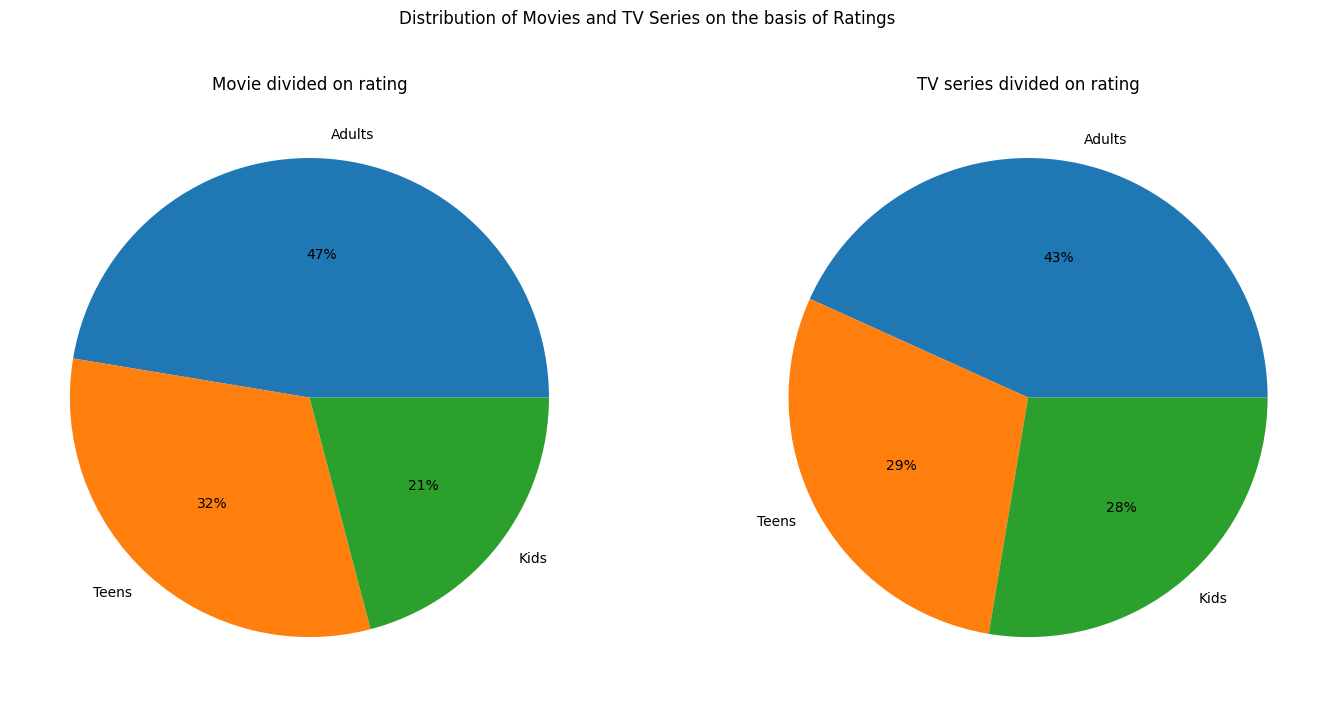

In [ ]:

mv_genres = df_movies.drop_duplicates(subset = ['rating','title'])
tv_genres = df_tvs.drop_duplicates(subset = ['rating','title'])
plt.figure(figsize=(17,8))
plt.suptitle('Distribution of Movies and TV Series on the basis of Ratings')

plt.subplot(1,2,1)
plt.pie(mv_genres['rating'].value_counts().values,labels = ['Adults', 'Teens','Kids'], autopct = '%0.0f%%')
plt.title('Movie divided on rating')

plt.subplot(1,2,2)
plt.pie(tv_genres['rating'].value_counts().values,labels = ['Adults', 'Teens','Kids'], autopct = '%0.0f%%')
plt.title('TV series divided on rating')

**Note:** We are dropping duplicates for plotting this graph, since we need the un-nested data for each genre and title. Hence, we will get only a single row for each genre and title separately and this will allow us to get an accurate count of data

**Inference:** As per the chart most of the movies and TV shows are produced for Adults followed by Teens and Kids.

**Recommendation:** More and more content (like Sports, animated movies, creative  contents) related to Teens must be created so as to increase their viewership on Netflix.


We are dropping duplicates for plotting this graph, since we need the un-nested data for each year and title. Hence, we will get only a single row for each year and title separately and this will allow us to get an accurate count of data

Text(0.5, 1.0, 'Day wise')

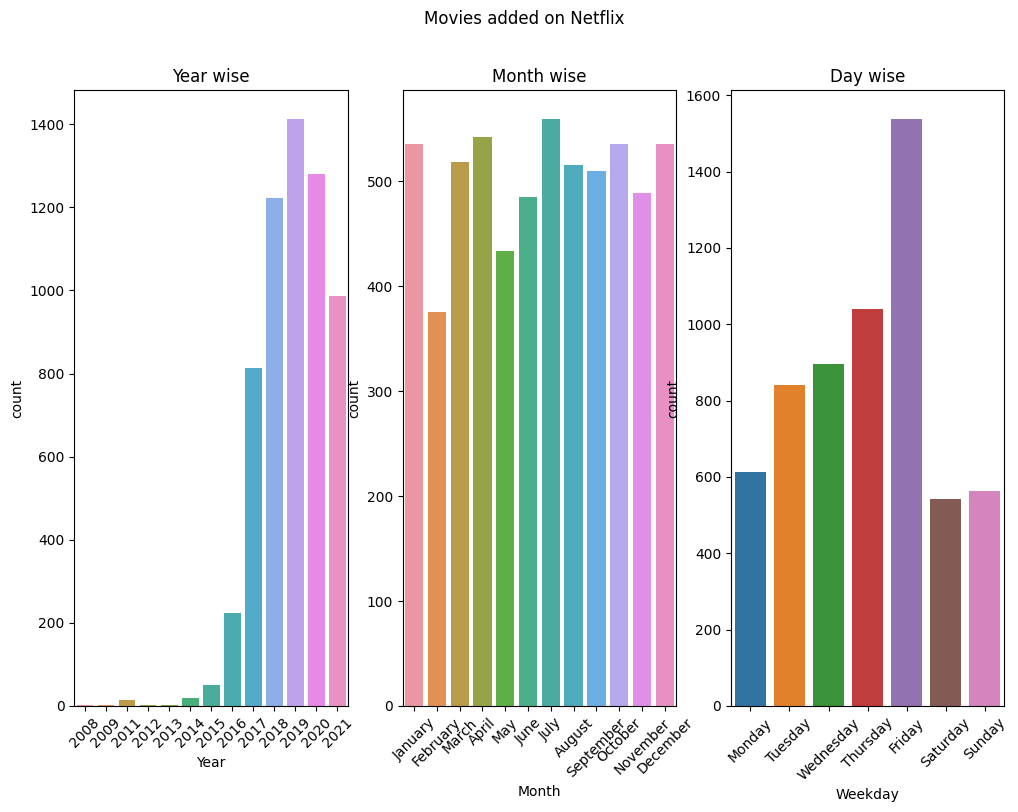

In [ ]:
df_movies_temp = df_movies.drop_duplicates(subset = ['year','title'])


mv_year = df_movies_temp['year'].value_counts()
mv_year.sort_index(inplace=True)

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December']
mv_month = df_movies_temp['month_name'].value_counts().loc[month_order]

day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
mv_day = df_movies_temp['weekday'].value_counts().loc[day_order]


plt.figure(figsize=(12,8))
plt.suptitle('Movies added on Netflix')

plt.subplot(1,3,1)
sns.countplot(data=df_movies_temp, x='year', order = mv_year.index)
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.title('Year wise')

plt.subplot(1,3,2)
sns.countplot(data=df_movies_temp, x='month_name', order = mv_month.index)
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.title('Month wise')


plt.subplot(1,3,3)
sns.countplot(data=df_movies_temp, x='weekday', order = mv_day.index)
plt.xticks(rotation=45)
plt.xlabel('Weekday')
plt.title('Day wise')


**Inference**: As per the data, most movies were released in the year 2019 and 2020. In terms of month most of them were released in the month of July followed by April and January.

**We can also see that most most movies released on Friday.**




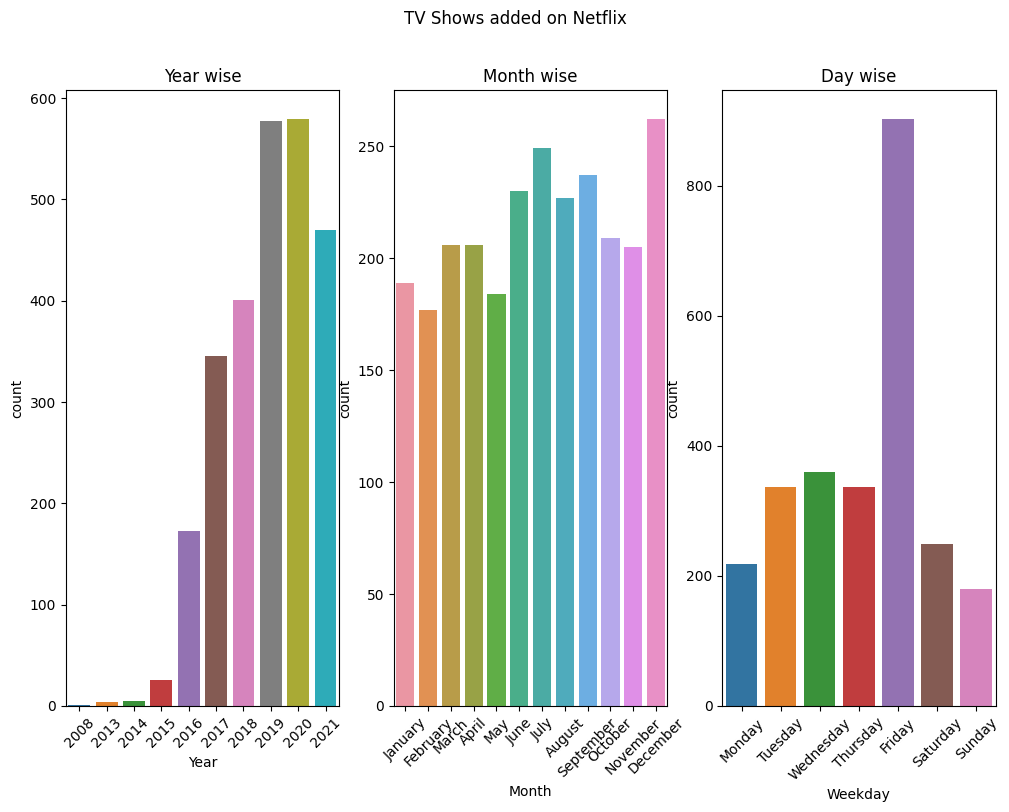

In [ ]:
df_tvs_temp = df_tvs_temp.drop_duplicates(subset = ['year','title'])


month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December']
tv_month = df_tvs_temp['month_name'].value_counts().loc[month_order]

day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
tv_day = df_tvs_temp['weekday'].value_counts().loc[day_order]

tv_year = df_tvs_temp['year'].value_counts()
tv_year.sort_index(inplace=True)


plt.figure(figsize=(12,8))
plt.suptitle('TV Shows added on Netflix')

plt.subplot(1,3,1)
sns.countplot(data=df_tvs_temp, x='year', order = tv_year.index)
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.title('Year wise')

plt.subplot(1,3,2)
sns.countplot(data=df_tvs_temp, x='month_name', order = tv_month.index)
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.title('Month wise')


plt.subplot(1,3,3)
sns.countplot(data=df_tvs_temp, x='weekday', order = tv_day.index)
plt.xticks(rotation=45)
plt.xlabel('Weekday')
plt.title('Day wise')


plt.show()


**Inference**: As per the data, most TV shows were released in the year 2019 and 2020. In terms of month most of them were released in the month of December followed by July and September.

We can also see that most most shows re released on Friday.

**Recommendation**: To increase the viewership in India more shows must be released during the festival seasons i.e October to December.

**Also, in terms of day of the week the TV shows must be released on Friday since it is the start of the weekend.**

Text(0, 0.5, 'TV Series Count')

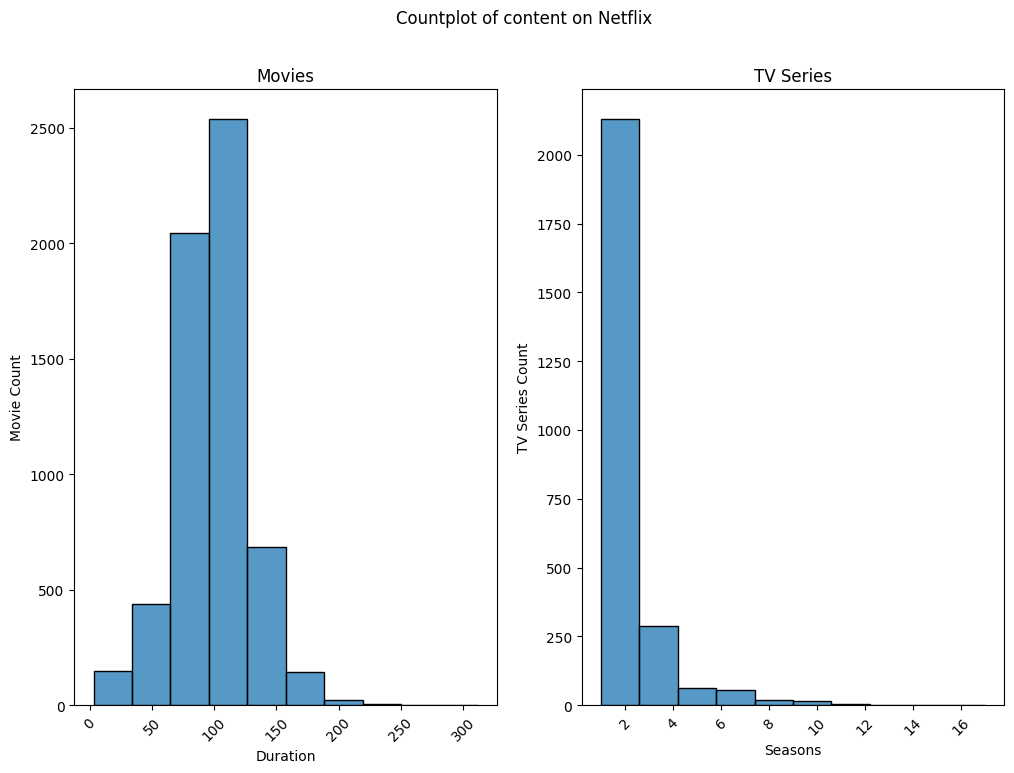

In [ ]:
df_movies_temp = df_movies.drop_duplicates(subset = ['duration','title'])
df_tv_duration_temp = df_tvs.drop_duplicates(subset = ['Seasons','title'])


plt.figure(figsize=(12,8))
plt.suptitle('Countplot of content on Netflix')

plt.subplot(1,2,1)
sns.histplot(data=df_movies_temp['duration'].astype(int), bins=10)
plt.title("Movies")
plt.xticks(rotation=45)
plt.xlabel('Duration')
plt.ylabel('Movie Count')

plt.subplot(1,2,2)
sns.histplot(data=df_tv_duration_temp['Seasons'].astype(int), bins=10)
plt.title("TV Series")
plt.xticks(rotation=45)
plt.xlabel('Seasons')
plt.ylabel('TV Series Count')

**Inference**: As per data, it can be inferred that most movies have been produced for the duration of 65 mins to 125 mins

Most TV shows have been produced for 2 seasons.

**Recommendation**: In order to keep the audience engaged, the movie duration must be kept upto 65 mins to 125 mins and upto 2 seasons for a TV show.

<ipython-input-113-55a4106ec78a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies_temp['duration'] = df_movies_temp['duration'].astype(int)
<ipython-input-113-55a4106ec78a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tv_duration_temp['Seasons'] = df_tv_duration_temp['Seasons'].astype(int)


1.0


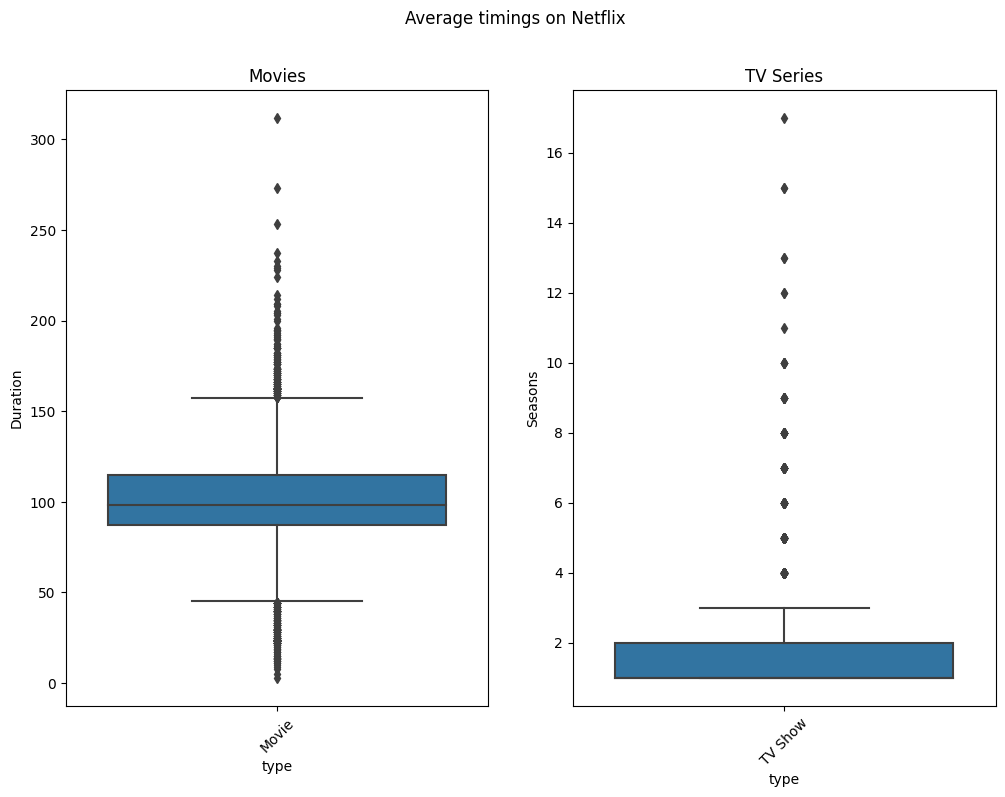

In [ ]:
df_movies_temp = df_movies.drop_duplicates(subset = ['duration','title'])
df_tv_duration_temp = df_tvs.drop_duplicates(subset = ['Seasons','title'])

df_movies_temp['duration'] = df_movies_temp['duration'].astype(int)
df_tv_duration_temp['Seasons'] = df_tv_duration_temp['Seasons'].astype(int)

plt.figure(figsize=(12,8))
plt.suptitle('Average timings on Netflix')

plt.subplot(1,2,1)
sns.boxplot(data=df_movies_temp, x = 'type' , y = 'duration' )
plt.title("Movies")
plt.xticks(rotation=45)
plt.ylabel('Duration')

plt.subplot(1,2,2)
sns.boxplot(data=df_tv_duration_temp, x = 'type' , y = 'Seasons' )
plt.title("TV Series")
plt.xticks(rotation=45)
plt.ylabel('Seasons')

print(df_tv_duration_temp['Seasons'].median())

**Inference:** As per data, most of the Movies have median time of around 100 minutes and median Seasons for TV series are 1

Most Movies have a duration length from 50 to 160 mins

Most TV shows have from1 1-3 seasons.

**Recommendation:** In order to keep the audience engaged, the movie duration must be kept upto 160 mins and upto 3 seasons for a TV show.


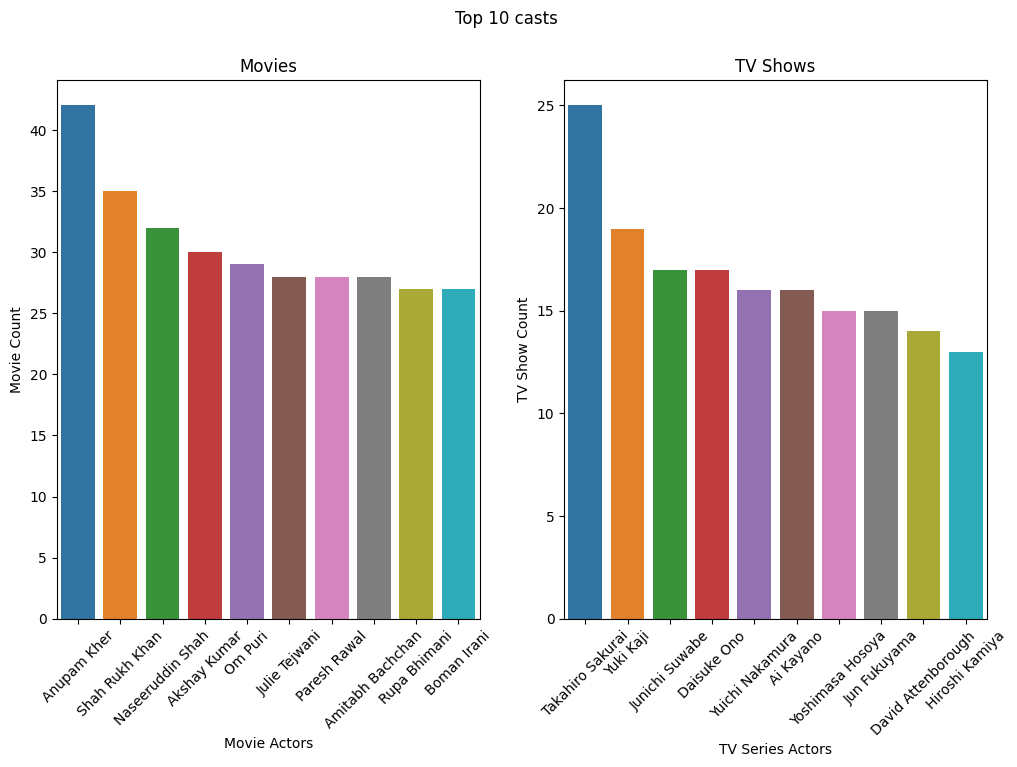

In [ ]:
df_movies_temp = df_movies.drop_duplicates(subset = ['cast','title'])
df_tvs_temp = df_tvs.drop_duplicates(subset = ['cast','title'])

plt.figure(figsize = (12,7))
plt.suptitle('Top 10 casts')
plt.subplot(1,2,1)
sns.countplot(data=df_movies_temp, x='cast', order = df_movies_temp['cast'].value_counts()[1:11].index)
plt.title("Movies")
plt.xticks(rotation=45)
plt.xlabel('Movie Actors')
plt.ylabel('Movie Count')

plt.subplot(1,2,2)
sns.countplot(data=df_tvs_temp, x='cast', order = df_tvs_temp['cast'].value_counts()[1:11].index)
plt.title("TV Shows")
plt.xticks(rotation=45)
plt.xlabel('TV Series Actors')
plt.ylabel('TV Show Count')

plt.show()

**Insight:** We can see that the Indian actors such as Anupam kher and Shahrukh khan have done most movies on Netflix. Top 10 actors in MOvies are India however, most of the TV series do not have India actors.

8 out of top 10 actors for movies are male however, only 2 are female.

**Recommendation:**
The top 10 TV actors do not have Indian actors, In order to increase viewership in India Netflix should have more TV shows with Indian actors in it.

In [ ]:
df_movies.groupby('country')['genre'].agg(pd.Series.mode)

country
                [Dramas, Independent Movies, International Mov...
Afghanistan                 [Documentaries, International Movies]
Albania                            [Dramas, International Movies]
Algeria                            [Dramas, International Movies]
Angola                 [Action & Adventure, International Movies]
                                      ...                        
Vatican City    [Documentaries, Faith & Spirituality, Internat...
Venezuela                                    International Movies
Vietnam                                      International Movies
West Germany                                 International Movies
Zimbabwe                                     International Movies
Name: genre, Length: 123, dtype: object

# **Displot** shows the count of Movies and TV Shows for each year and the trend for the same can be seen with the kde line

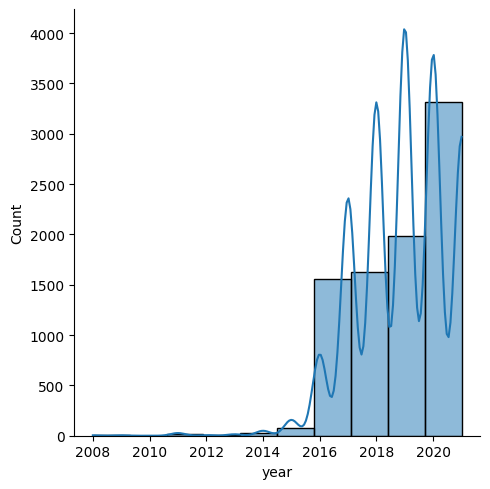

In [ ]:
sns.displot(df["year"],kde=True,bins=10)
plt.suptitle("Count")
plt.show()

**Insight:** With time there is an increase in online content, hence no of Movies and TV shows have aslo increased. We can also see a jump in content specially during lockdown (Year: 2020)

**Recommendation:** Since, the consumtion of online content has increased since the lockdown and theaters have closed hence, it is recommended to release online movie on Netflix to keep users engaged.

# **Heatmap** shows relation between year, month, day and release_year

<ipython-input-67-bba3f3574c21>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_new.corr(), cmap = 'Blues', annot=True)


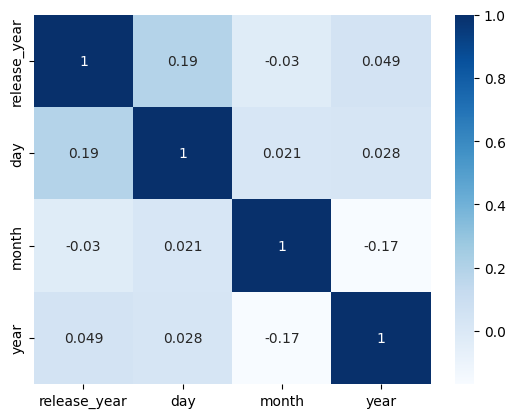

In [ ]:
sns.heatmap(df_new.corr(), cmap = 'Blues', annot=True)
plt.show()

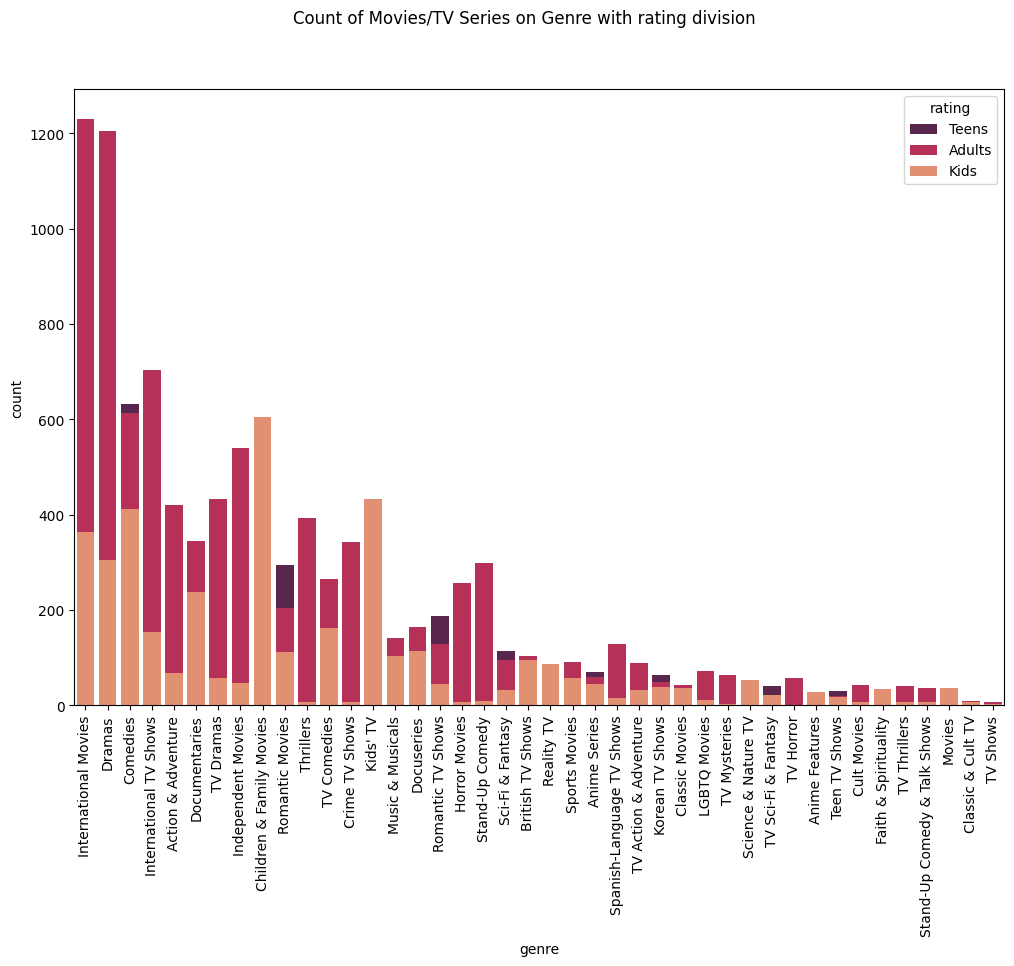

In [ ]:
df_temp = df_new.drop_duplicates(subset = ['genre','title'])

plt.figure(figsize=(12,8))
plt.suptitle('Count of Movies/TV Series on Genre with rating division')
sns.countplot(data=df_temp, x='genre', hue = 'rating', dodge=False, order = df_temp['genre'].value_counts().index,palette='rocket')
plt.xticks(rotation=90)
plt.show()

**Inference:** Most content are made for Adults.
**Recommendation:** To increase more users Netflix should diversify the content for Teens and Kids as well by providing shows on Sports, Anime, Animated movies etc.

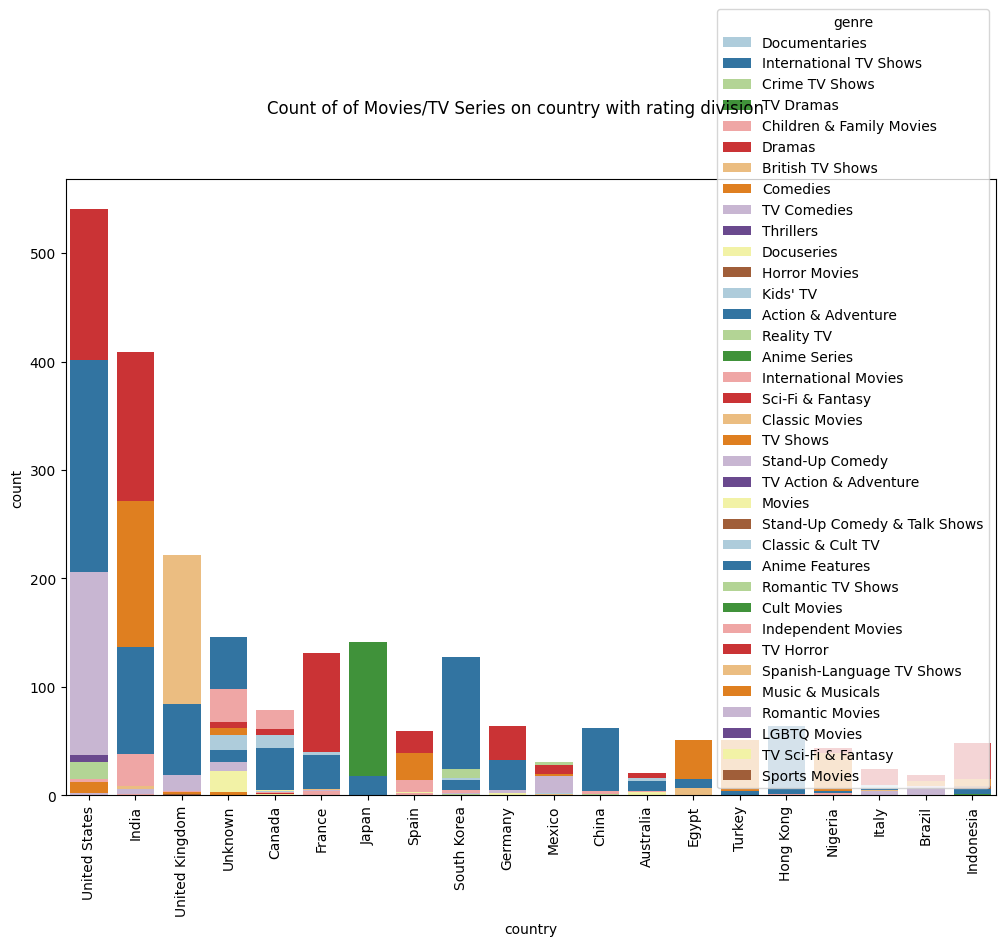

In [ ]:
df_temp = df_new.drop_duplicates(subset = ['country','title'])

plt.figure(figsize=(12,8))
plt.suptitle('Count of of Movies/TV Series on country with rating division')
sns.countplot(data=df_temp, x='country', hue = 'genre', dodge=False, order = df_temp['country'].value_counts().head(20).index,palette='Paired')
plt.xticks(rotation=90)
plt.show()

**Inference:** From the above graph we can infer that INternational  shows and Dramas genre have the highest viewership in each country
**Recommendation:** In order to attract more audience to Netflix more shows must be produced for other genres as well.

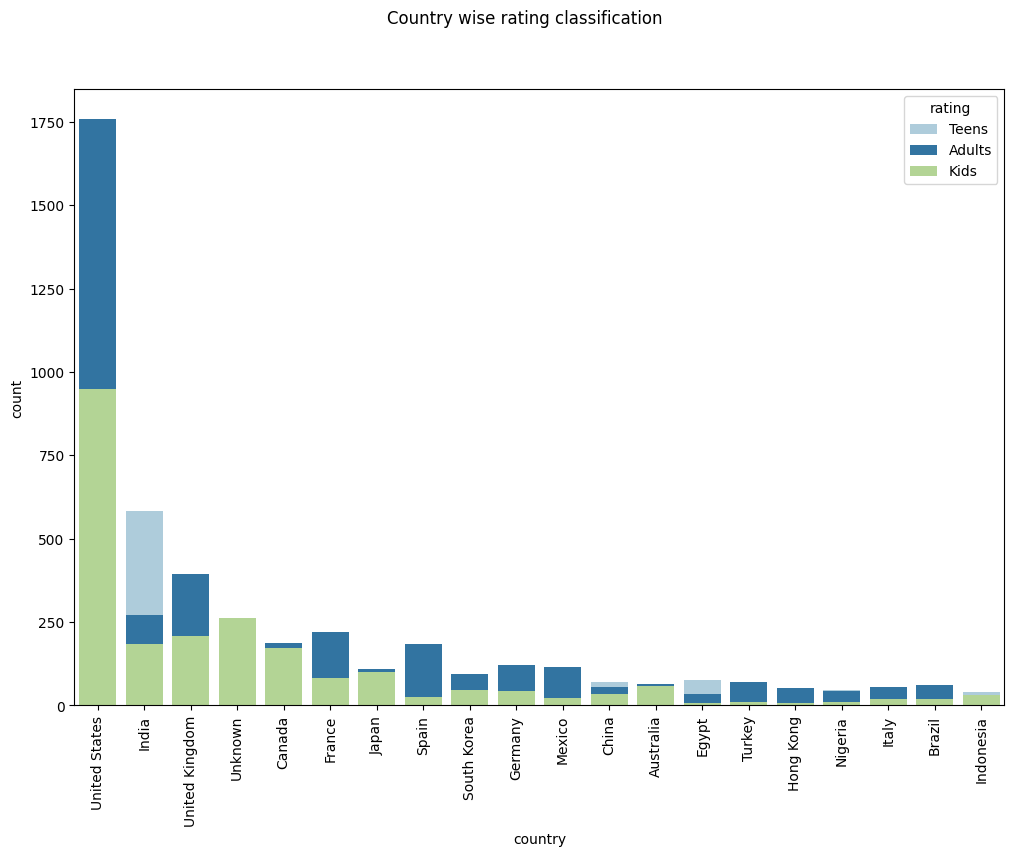

In [ ]:
df_temp = df_new.drop_duplicates(subset = ['country','title'])

plt.figure(figsize=(12,8))
plt.suptitle('Country wise rating classification')
sns.countplot(data=df_temp, x='country', hue = 'rating', dodge=False, order = df_temp['country'].value_counts().head(20).index,palette='Paired')
plt.xticks(rotation=90)
plt.show()

**Inference:** In US we can see that there is almost no content for Teens, whereas in India there is a lot of content for Teens
**Recommendation:** In order to attract more audience to Netflix more shows must be produced for other genres as well.

Pair plot displaying to show behaviour of each catgeory for Movies and TV Shows

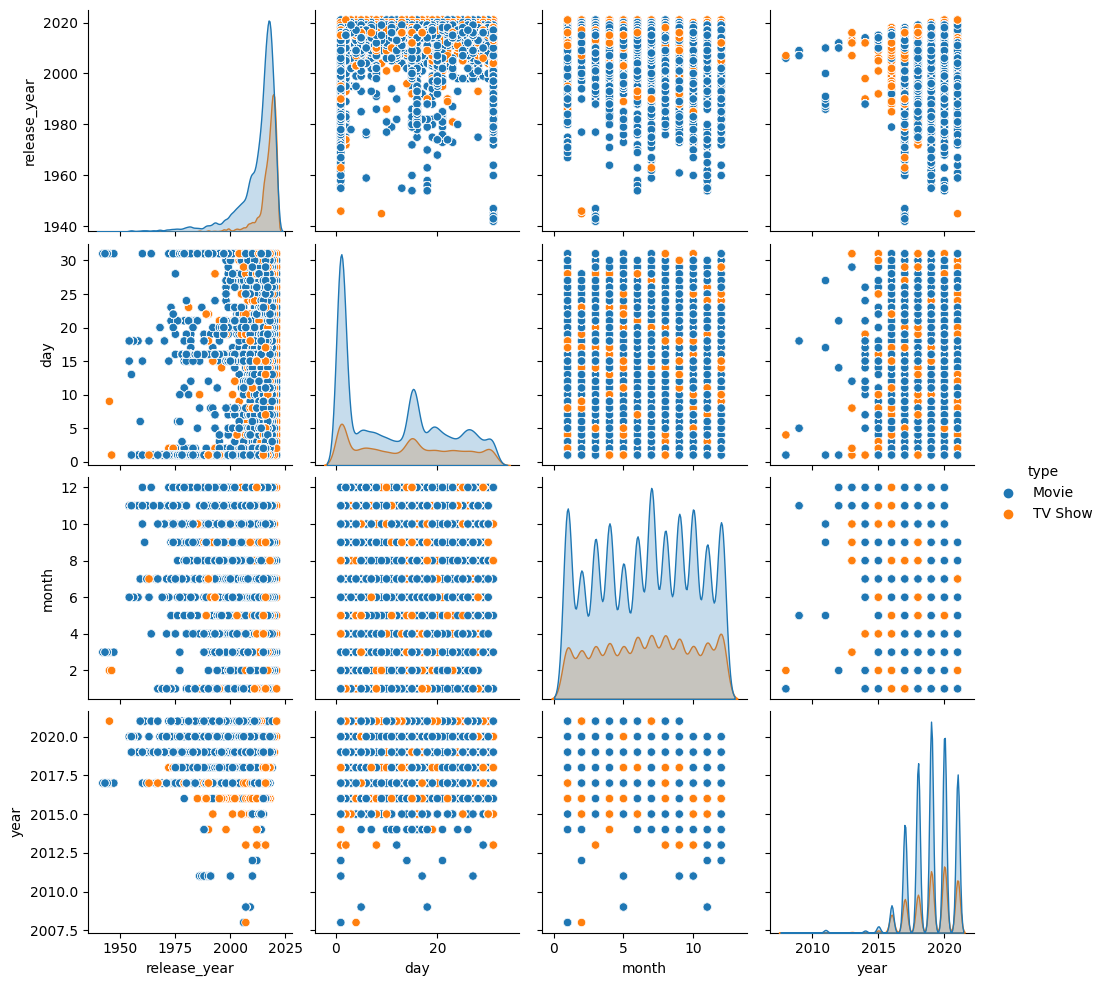

In [ ]:
sns.pairplot(data=df_new,hue="type")